In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets
import os

In [5]:
# Get data
data_dir = "/Users/dj/Documents/GitHub/project-neurocloud/my_app/app_data/possum.csv"
df = pd.read_csv(data_dir)
df = df.dropna()

X = df.drop(["case", "site", "Pop", 'earconch', 'footlgth', 'sex'], axis=1)
y = df["sex"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_features="auto", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [8]:
predictions = rf_model.predict(X_test)
predictions

array(['f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f',
       'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm',
       'f', 'f', 'f', 'm', 'm'], dtype=object)

In [9]:
# The true values are the following:
np.array(y_test)

array(['f', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm',
       'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm',
       'm', 'm', 'f', 'm', 'f'], dtype=object)

In [10]:
comparison = pd.DataFrame({"Predictions": predictions, "Actual": np.array(y_test)})
comparison

,Predictions,Actual
0,f,f
1,m,m
2,f,f
3,f,m
4,m,m
5,f,f
6,m,f
7,m,m
8,f,f
9,m,m


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 6,  7],
       [ 5, 13]])

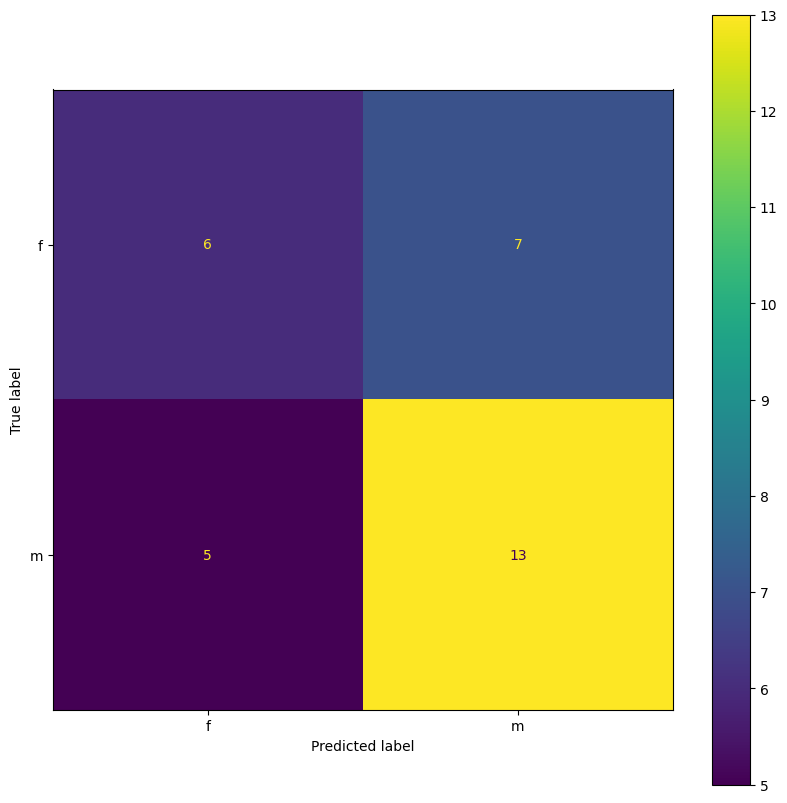

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

In [13]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print(f'The importance of feature {columns[i]} is {round(importances[i] * 100,2)} %.')
    i += 1

The importance of feature age is 6.93 %.
The importance of feature hdlngth is 16.18 %.
The importance of feature skullw is 13.81 %.
The importance of feature totlngth is 12.65 %.
The importance of feature taill is 11.79 %.
The importance of feature eye is 18.25 %.
The importance of feature chest is 8.35 %.
The importance of feature belly is 12.05 %.


In [18]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           f       0.55      0.46      0.50        13
           m       0.65      0.72      0.68        18

    accuracy                           0.61        31
   macro avg       0.60      0.59      0.59        31
weighted avg       0.61      0.61      0.61        31



In [20]:
###### Cross Validation
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
)

param_dist = {"n_estimators": randint(50, 100), "max_depth": randint(1, 10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print(rand_search.best_params_)

y_pred = best_rf.predict(X_test)

{'max_depth': 8, 'n_estimators': 88}


In [29]:
(y_pred)

array(['f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f',
       'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm',
       'f', 'f', 'f', 'm', 'm'], dtype=object)

In [36]:
y_test

87     f
58     m
69     f
70     m
48     m
39     f
22     f
47     m
10     f
0      m
18     f
30     m
100    m
33     m
80     m
4      f
96     m
81     f
12     m
31     f
79     m
92     m
26     f
44     m
73     f
15     m
41     m
75     m
9      f
99     m
11     f
Name: sex, dtype: object

In [30]:
(np.array(y_test))

array(['f', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm',
       'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm',
       'm', 'm', 'f', 'm', 'f'], dtype=object)

In [35]:
type(y_test[0])

str

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(np.array(y_test), y_pred, average="binary", pos_label="m")

Accuracy: 0.6451612903225806
Precision: 0.6842105263157895
Recall: 0.7222222222222222


<AxesSubplot:>

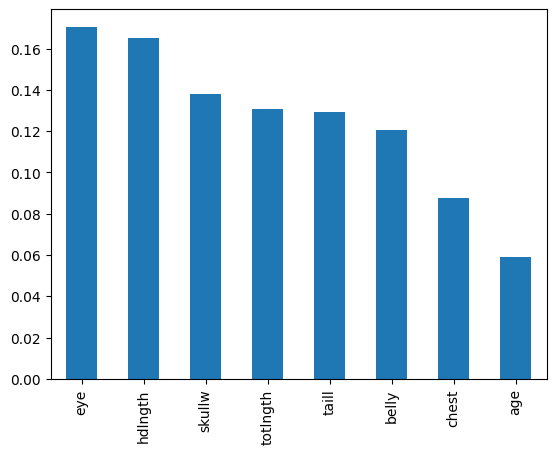

In [46]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(np.array(y_test), y_pred, average="binary", pos_label="m")
recall = recall_score(np.array(y_test), y_pred, average="binary", pos_label="m")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(
    best_rf.feature_importances_, index=X_train.columns
).sort_values(ascending=False)

# Plot a simple bar chart
(feature_importances.plot.bar())
